In [39]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

In [40]:
project_path="/usr/workspace/haridev/rabbits"
results = [{ "case": {"process_sharing": "fpp", "workload": "write-only", "sync": "fsync"},
            "ppn": [1-64],
            "nodes": [1],
            "rabbit": 1,
            "fs_type": "xfs",
            "logs":[f"{project_path}/benchmarks/ior/output/xfs/ior-20241014182525/result/*.csv",
                    f"{project_path}/benchmarks/ior/output/xfs/ior-20241014184458/result/*.csv",
                    f"{project_path}/benchmarks/ior/output/xfs/ior-20241014184928/result/*.csv",
                    f"{project_path}/benchmarks/ior/output/xfs/ior-20241014185601/result/*.csv",
                    f"{project_path}/benchmarks/ior/output/xfs/ior-20241014190055/result/*.csv",
                    f"{project_path}/benchmarks/ior/output/xfs/ior-20241014190713/result/*.csv",
                    f"{project_path}/benchmarks/ior/output/xfs/ior-20241014191819/result/*.csv"]
    
        },
        { "case": {"process_sharing": "fpp", "workload": "write-only", "sync": "fsync"},
        "ppn": [64],
        "nodes": [1-16],
        "rabbit": 1,
        "fs_type": "xfs",
        "logs":[f"{project_path}/benchmarks/ior/output/xfs/ior-20241014191819/result/*.csv",
                f"{project_path}/benchmarks/ior/output/xfs/ior-20241014194044/result/*.csv",
                f"{project_path}/benchmarks/ior/output/xfs/ior-20241014200912/result/*.csv",
                f"{project_path}/benchmarks/ior/output/xfs/ior-20241014204803/result/*.csv",
                f"{project_path}/benchmarks/ior/output/xfs/ior-20241014225041/result/*.csv",]

},        
        {
        "case": {"process_sharing": "fpp", "workload": "write-only"},
        "ppn": [64],
        "nodes": [1-16],
        "rabbit": 1,
        "fs_type": "xfs",
        "logs":[f"{project_path}/benchmarks/ior/output/xfs/ior-20241015144913/result/*.csv",]
        },
        { "case": {"process_sharing": "fpp", "workload": "write-only"},
        "ppn": [96],
        "nodes": [1-16],
        "rabbit": 1,
        "fs_type": "xfs",
        "logs":[f"{project_path}/benchmarks/ior/output/xfs/ior-20241015130504/result/*.csv",]
        },
           ]

In [41]:
def get_case(data):
    case_str=""
    total_char=len(data["case"])
    char_index=0
    for key, value in data["case"].items():
        case_str+=value
        if char_index < total_char - 1:
            case_str+="-"
        char_index+=1
    return case_str
def percentile(n):
    return dd.Aggregation(
        name='percentile_{:02.0f}'.format(n*100),
        # this computes the median on each partition
        chunk=lambda s: s.quantile(n),
        # this combines results across partitions; the input should just be a list of length 1
        agg=lambda s0: s0.quantile(n),
    )
median_fun = dd.Aggregation(
    name="median",
    # this computes the median on each partition
    chunk=lambda s: s.median(),
    # this combines results across partitions; the input should just be a list of length 1
    agg=lambda s0: s0.median(),
)

Case 0 fpp-write-only-fsync


Text(0, 0.5, 'Bandwidth MB/s')

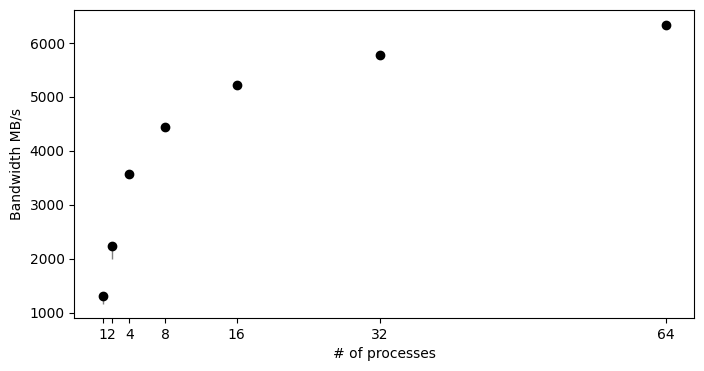

In [42]:
selected_case=0
result=results[selected_case]
current_case_str = get_case(result)
print(f"Case {selected_case} {current_case_str}")
ddf = dd.read_csv(result["logs"])
data = ddf[["numTasks","iter","bw(MiB/s)"]].groupby(["numTasks"]).agg({"bw(MiB/s)":[sum, "mean", median_fun, min, max, "std", percentile(.25), percentile(.75)]}).compute()
plt.figure(figsize=(8,4))
plt.errorbar(data.index, data[("bw(MiB/s)", "mean")], data[("bw(MiB/s)", "std")], fmt='ok', lw=3)
plt.errorbar(data.index, data[("bw(MiB/s)", "mean")], [data[("bw(MiB/s)", "mean")] - data[("bw(MiB/s)", "min")], data[("bw(MiB/s)", "max")] - data[("bw(MiB/s)", "mean")]],
             fmt='.k', ecolor='gray', lw=1)
plt.xticks(data.index, labels = data.index)
plt.xlabel("# of processes")
plt.ylabel("Bandwidth MB/s")


Case 1 fpp-write-only-fsync


Text(0, 0.5, 'Bandwidth MB/s')

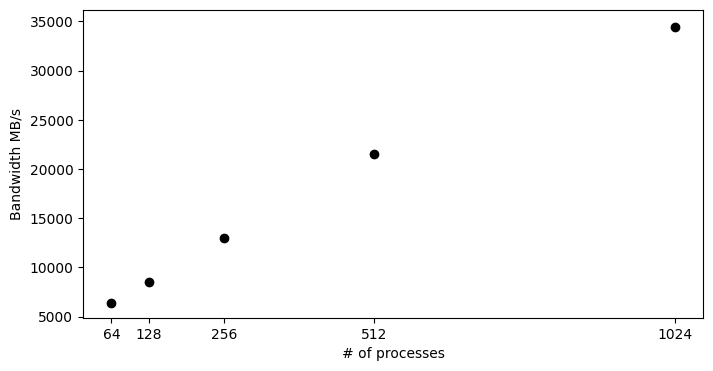

In [43]:
selected_case=1
result=results[selected_case]
current_case_str = get_case(result)
print(f"Case {selected_case} {current_case_str}")
ddf = dd.read_csv(result["logs"])
data = ddf[["numTasks","iter","bw(MiB/s)"]].groupby(["numTasks"]).agg({"bw(MiB/s)":[sum, "mean", median_fun, min, max, "std", percentile(.25), percentile(.75)]}).compute()
plt.figure(figsize=(8,4))
plt.errorbar(data.index, data[("bw(MiB/s)", "mean")], data[("bw(MiB/s)", "std")], fmt='ok', lw=3)
plt.errorbar(data.index, data[("bw(MiB/s)", "mean")], [data[("bw(MiB/s)", "mean")] - data[("bw(MiB/s)", "min")], data[("bw(MiB/s)", "max")] - data[("bw(MiB/s)", "mean")]],
             fmt='.k', ecolor='gray', lw=1)
plt.xticks(data.index, labels = data.index)
plt.xlabel("# of processes")
plt.ylabel("Bandwidth MB/s")


Case 2 fpp-write-only


Text(0, 0.5, 'Bandwidth MB/s')

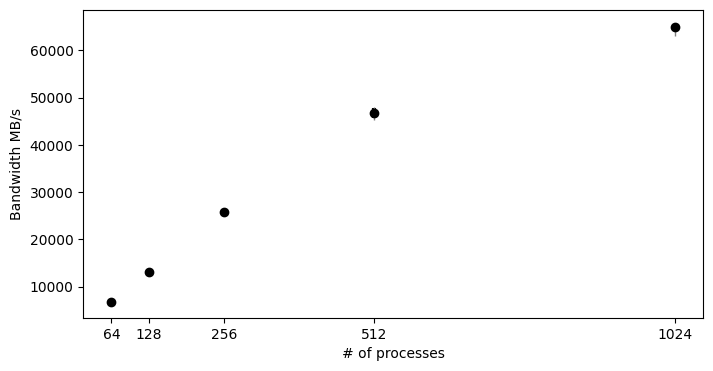

In [44]:
selected_case=2
result=results[selected_case]
current_case_str = get_case(result)
print(f"Case {selected_case} {current_case_str}")
ddf = dd.read_csv(result["logs"])
data = ddf[["numTasks","iter","bw(MiB/s)"]].groupby(["numTasks"]).agg({"bw(MiB/s)":[sum, "mean", median_fun, min, max, "std", percentile(.25), percentile(.75)]}).compute()
plt.figure(figsize=(8,4))
plt.errorbar(data.index, data[("bw(MiB/s)", "mean")], data[("bw(MiB/s)", "std")], fmt='ok', lw=3)
plt.errorbar(data.index, data[("bw(MiB/s)", "mean")], [data[("bw(MiB/s)", "mean")] - data[("bw(MiB/s)", "min")], data[("bw(MiB/s)", "max")] - data[("bw(MiB/s)", "mean")]],
             fmt='.k', ecolor='gray', lw=1)
plt.xticks(data.index, labels = data.index)
plt.xlabel("# of processes")
plt.ylabel("Bandwidth MB/s")


Case 3 fpp-write-only


Text(0, 0.5, 'Bandwidth MB/s')

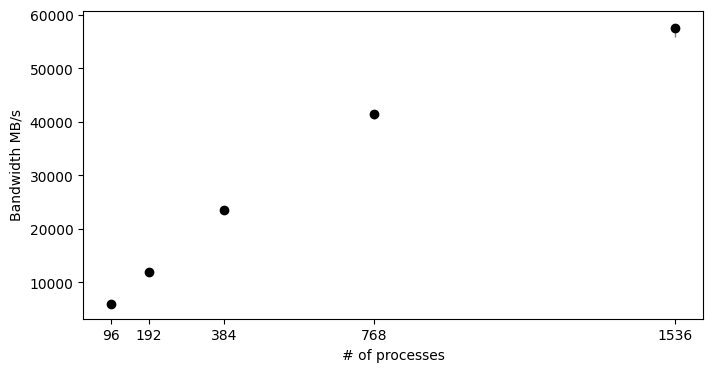

In [45]:
selected_case=3
result=results[selected_case]
current_case_str = get_case(result)
print(f"Case {selected_case} {current_case_str}")
ddf = dd.read_csv(result["logs"])
data = ddf[["numTasks","iter","bw(MiB/s)"]].groupby(["numTasks"]).agg({"bw(MiB/s)":[sum, "mean", median_fun, min, max, "std", percentile(.25), percentile(.75)]}).compute()
plt.figure(figsize=(8,4))
plt.errorbar(data.index, data[("bw(MiB/s)", "mean")], data[("bw(MiB/s)", "std")], fmt='ok', lw=3)
plt.errorbar(data.index, data[("bw(MiB/s)", "mean")], [data[("bw(MiB/s)", "mean")] - data[("bw(MiB/s)", "min")], data[("bw(MiB/s)", "max")] - data[("bw(MiB/s)", "mean")]],
             fmt='.k', ecolor='gray', lw=1)
plt.xticks(data.index, labels = data.index)
plt.xlabel("# of processes")
plt.ylabel("Bandwidth MB/s")
